In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("/nfs/homedirs/pala/scportrait_ot/project_folder/data/codex/expression_prediction/healthy_hvgs.h5ad")

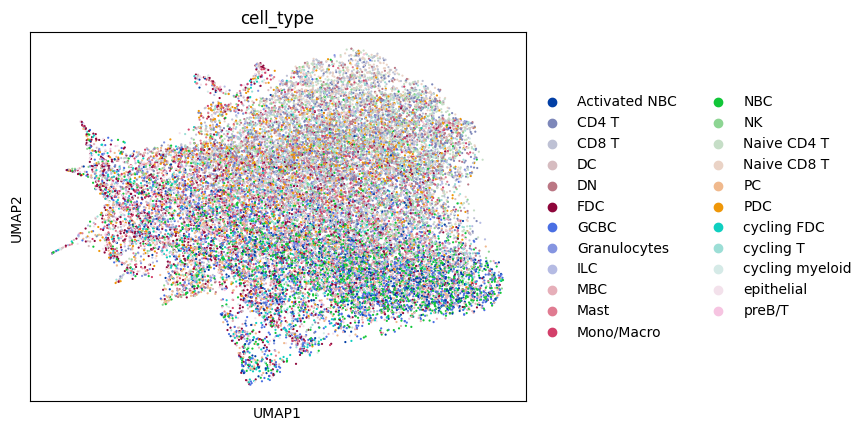

In [3]:
sc.pl.umap(adata, color="cell_type",s=10)

In [4]:
adata_sc_exp = sc.AnnData(X=adata.obsm["X_rna_predicted"].copy(), obs=adata.obs.copy())

In [5]:
sc.pp.log1p(adata_sc_exp)
sc.tl.pca(adata_sc_exp)
sc.pp.neighbors(adata_sc_exp)
sc.tl.umap(adata_sc_exp)

In [6]:
adata_sc_exp

AnnData object with n_obs × n_vars = 24981 × 1765
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id', 'cell_type'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

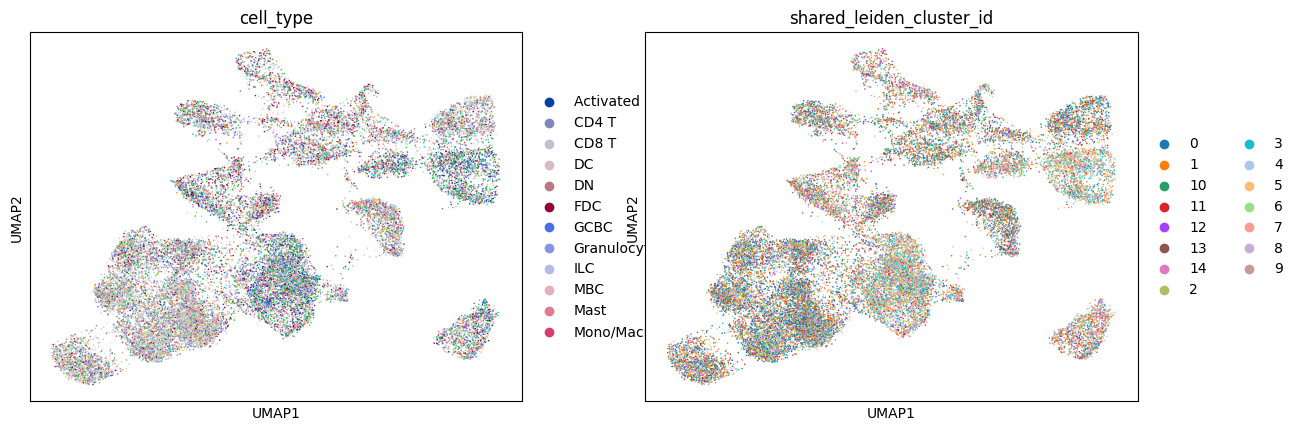

In [7]:
sc.pl.umap(adata_sc_exp, color=["cell_type","shared_leiden_cluster_id"])

## Check CODEX feature distribution

In [8]:
healthy_codex = sc.read_h5ad("/nfs/homedirs/pala/scportrait_ot/project_folder/data/codex/cellfeaturization_results_healthy.h5ad")

In [9]:
healthy_codex_processed = sc.read_h5ad("/nfs/homedirs/pala/scportrait_ot/project_folder/data/codex/cellfeaturization_results_healthy_processed.h5ad")

In [10]:
# for idx in range(healthy_codex_processed.shape[1]):
#     if "summed_intensity_nucleus" in list(healthy_codex_processed.var.index)[idx]:
#         print("Max:", healthy_codex_processed[:, idx].X.max())
#         print("Min:", healthy_codex_processed[:, idx].X.min())
#         print("Mean:", healthy_codex_processed[:, idx].X.mean())
#         print()

for idx in range(healthy_codex_processed.shape[1]):
    print("Max:", healthy_codex_processed[:, idx].X.max())
    print("Min:", healthy_codex_processed[:, idx].X.min())
    print("Mean:", healthy_codex_processed[:, idx].X.mean())
    print()

Max: 0.08026814
Min: 1.6878785e-08
Mean: 0.0046021496

Max: 0.16699073
Min: 0.0008096562
Mean: 0.005587157

Max: 0.19259523
Min: 1.3641139e-05
Mean: 0.0008991925

Max: 0.08771336
Min: 5.1309344e-05
Mean: 0.027958395

Max: 0.09820566
Min: 0.0
Mean: 0.003047358

Max: 0.07148059
Min: 0.0
Mean: 0.0055191587

Max: 0.13029921
Min: 0.0010838907
Mean: 0.0073070205

Max: 0.1188362
Min: 0.0044779037
Mean: 0.027066812

Max: 0.11780305
Min: 0.0028767488
Mean: 0.021988742

Max: 0.07715409
Min: 0.0016734746
Mean: 0.00962016

Max: 0.076814696
Min: 2.5098752e-05
Mean: 0.0037926612

Max: 0.18169317
Min: 0.0038980923
Mean: 0.0286456

Max: 0.06812325
Min: 0.0014594282
Mean: 0.008596964

Max: 0.14579378
Min: 6.5365048e-06
Mean: 0.004707484

Max: 0.08449058
Min: 0.008372214
Mean: 0.026240977

Max: 0.07884574
Min: 8.694952e-05
Mean: 0.017862195

Max: 0.11996032
Min: 0.00020259485
Mean: 0.0041504134

Max: 0.10399416
Min: 0.0014024677
Mean: 0.0118666785

Max: 0.083381
Min: 0.0
Mean: 0.0012981008

Max: 0.25054

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
healthy_codex_processed.X = scaler.fit_transform(healthy_codex_processed.X)

In [13]:
for idx in range(healthy_codex_processed.shape[1]):
    print("Max:", healthy_codex_processed[:, idx].X.max())
    print("Min:", healthy_codex_processed[:, idx].X.min())
    print("Mean:", healthy_codex_processed[:, idx].X.mean())
    print()

Max: 16.114162
Min: -0.98009044
Mean: 1.0078461e-08

Max: 27.63793
Min: -0.81807506
Mean: 0.0

Max: 58.979
Min: -0.27245706
Mean: 1.8324473e-09

Max: 4.684825
Min: -2.187932
Mean: -8.551421e-09

Max: 13.903427
Min: -0.44524467
Mean: 0.0

Max: 9.958527
Min: -0.8332549
Mean: -1.2216316e-08

Max: 34.201954
Min: -1.7305427
Mean: 4.8865263e-09

Max: 12.405313
Min: -3.05355
Mean: 1.3437948e-08

Max: 13.145152
Min: -2.6220515
Mean: -4.8865263e-09

Max: 13.417915
Min: -1.5788796
Mean: -4.8865263e-09

Max: 15.442467
Min: -0.79675204
Mean: 3.359487e-09

Max: 18.840122
Min: -3.046413
Mean: -1.2216316e-09

Max: 11.850305
Min: -1.4209181
Mean: -2.4432631e-09

Max: 36.076283
Min: -1.2020494
Mean: -1.8324473e-09

Max: 8.346
Min: -2.560235
Mean: -6.108158e-10

Max: 5.4556346
Min: -1.590187
Mean: 7.329789e-09

Max: 30.10751
Min: -1.0263283
Mean: 1.8324473e-09

Max: 22.035233
Min: -2.5028505
Mean: 1.0994684e-08

Max: 21.790163
Min: -0.34460077
Mean: 3.054079e-09

Max: 28.148401
Min: -1.3578277
Mean: -6.